# Instacart Insights: Unpacking Grocery Shopping Patterns
**Overview :** Understanding customer purchasing behavior is crcial for enhancing the customer experience, optimizing product offerins, and improving operational efficiency. This project focuses on analyzing the purchasing patterns of customers and providing actionable insights that can lead to more personalizedd product recommendationa dn improved iventory management. 

**Objective :** By leveraging transaction data, the goal is to uncover patterns in customer preferences, identify frequently purchased items, and develop strategies for personalized recommendations. Ultimately, the project aims to contribute to optimizing the shopping experience for customers and boosting overall sales for the business.

**Goal :** Offer actionable insights that can help the business in improving its product assortment, inventory management, and customer targeting strategies.


In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#create df and sample data
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
print(df_instacart_orders.head())
print()
df_instacart_orders.info()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nu

In [3]:
#create df and sample data
df_products = pd.read_csv('/datasets/products.csv', sep=';')
print(df_products.head())
print()
df_products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
#create df and sample data
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
print(df_order_products.head())
print()
print(df_order_products.info())
print(df_order_products['add_to_cart_order'].isna().sum())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
836


In [5]:
#create df and sample data
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
print(df_aisles.head())
print()
df_aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
#create df and sample data
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
print(df_departments.head())
print()
df_departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


**Summary :** Column names do not need to be renamed. Missing values in df_instacart_orders under days_since_prior_order and in df_order_products under add_to_cart_order. Optimal data type for df_instacart_orders['days_since_prior_order'] and df_order_products['add_to_cart_order'] is int64 not float64. 

## Find and remove duplicate values 

### `orders` data frame

In [7]:
# Check for duplicated orders
# create df of duplicate rows (15 duplicate rows)
duplicates = df_instacart_orders[df_instacart_orders.duplicated()]
print(duplicates.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 145574 to 441599
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                15 non-null     int64  
 1   user_id                 15 non-null     int64  
 2   order_number            15 non-null     int64  
 3   order_dow               15 non-null     int64  
 4   order_hour_of_day       15 non-null     int64  
 5   days_since_prior_order  13 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 840.0 bytes
None


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
# create df of orders placed Wendnesday at 2:00 AM assuming Sunday = 0 (121 orders)
wed_orders = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]
wed_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
# filter duplicate orders (478,952 entries after dropping duplicates (478,967 (Original) - 478,952 = 15)
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)
print(df_instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [10]:
# Double check for duplicate rows
# Check for duplicate rows (No duplicate rows)
print(df_instacart_orders.duplicated().sum())

0


In [11]:
# Double check for duplicate order IDs only
# Check for duplicate order ids (No duplicate order ids)
dup_ids = df_instacart_orders['order_id'].duplicated().sum()
print(dup_ids)
## Updated : changed to df_instacart_orders

0


**Conclusion :** The analysis above provides a more reliable dataset to make decisions, ensuring resources are allocated efficiently while providing insights that can guide marketing and operational strategies. However, for the purpose of this analysis, we chose to remove the identified duplicates to ensure that they did not skew the results. Additionally, we conducted a check on the "Order ID" column and found no duplicate entries, confirming the uniqueness of each order record. While the duplicates we identified were limited in scope, the potential data quality issue could impact the accuracy of reporting, especially if it is indicative of a broader pattern. The data quality team should be informed to ensure this issue is addressed for future analyses.

### `products` data frame

In [12]:
# Check for fully duplicate rows
# create df of duplicate rows (No fully duplicated rows)
duplicates = df_products[df_products.duplicated()]
print(duplicates.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     0 non-null      int64 
 1   product_name   0 non-null      object
 2   aisle_id       0 non-null      int64 
 3   department_id  0 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 0.0+ bytes
None


In [13]:
# Check for just duplicate product IDs
# create df of duplicate product ids (No duplicate product ids)
dup_product_ids = df_products[df_products['product_id'].duplicated()]
print(dup_product_ids.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     0 non-null      int64 
 1   product_name   0 non-null      object
 2   aisle_id       0 non-null      int64 
 3   department_id  0 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 0.0+ bytes
None


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
# create df of duplicate product names (1361 rows of duplicate product names - some are duplicate missing values)
dup_product_names = df_products[df_products['product_name'].str.lower().duplicated()]
dup_product_names

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [15]:
# Check for duplicate product names that aren't missing
# create df of duplicate product names that do not have missing values (1361 (Original) - 104 = 1257 missing values)
dup_product_names_2 = dup_product_names[dup_product_names['product_name'].notna()]
dup_product_names_2

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


### `departments` data frame

In [16]:
# calulate number of unique department ids 
# 21 unique department ids
depart_ids = df_departments['department_id'].unique()
print(depart_ids)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [17]:
# calulate number of unique department names (same as original length)
depart_names = df_departments['department'].duplicated().sum()
print(depart_names)
## Updated : changed to duplicated().sum()

0


**Summary :** The uniqueness of department names ensures consistency in how products are categorized across the platform. With 21 distinct department IDs, the business can leverage these categories to improve product recommendations, inventory management, and marketing strategies. Since no duplicates in department names were found, the data is well-organized and can be reliably used for further analysis and segmentation.

### `aisles` data frame

In [18]:
# calulate number of unique aisle ids (same as original length)
aisle_ids = df_aisles['aisle_id'].unique()
print(len(aisle_ids))

134


In [19]:
# calulate number of unique aisle names (same as original length)
aisle_names = df_aisles['aisle'].unique()
print(len(aisle_names))

134


**Summary :** df_departments and df_aisles have all unique values that will be reference for deparment names and aislse names. Df_products will also be referenced but had some missing values. 

### `order_products` data frame

In [20]:
# Check for fully duplicate rows
# create df of duplicated products (Empty df showing no duplicate rows)
dup_order_products = df_order_products[df_order_products.duplicated()]
print(dup_order_products)



Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [21]:
# Double check for any other tricky duplicates
# create df of duplicated order ids in order_products (4,094,961 order ids share the same value)
dup_order_ids = df_order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(dup_order_ids)

## Added filter for order_id and product_id (No duplicates found where order_id and product id are same value)
dup_order_ids_2 = df_order_products.duplicated(subset='order_id').count()
print()
print(dup_order_ids_2)

## Updated : filter for order_id duplicates showing possible multiple product ids per order id


0

4545007


**Summary :** While no significant duplicate data issues were found in terms of exact order-product combinations, the large number of repeated order_id and product_id pairs suggests that customers may frequently reorder the same products in different sessions. This could indicate valuable insights for product recommendation systems or loyalty programs

## Find and remove missing values


### `products` data frame

In [22]:
# create df of missing values
products_missing = df_products.isna().sum()
print(products_missing)

## Updated : changes to isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [23]:
# Are all of the missing product names associated with aisle ID 100?
# create df of missing product names 
aisle_check = df_products[df_products['product_name'].isna()]
print(aisle_check)

# caluclate frequency of values (Only value for aisle_id is 100) (Answer: Yes)
aisle_check = aisle_check['aisle_id'].value_counts()                    
print(aisle_check)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
100    1258
Name: aisle_id, dtype: int64


In [24]:
# Are all of the missing product names associated with department ID 21?
# create df of missing product names
department_check = df_products[df_products['product_name'].isna()]
print(department_check)

# caluclate frequency of values (Only value for department ID is 21) (Answer: Yes)
department_check = department_check['department_id'].value_counts()
print(department_check)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
21    1258
Name: department_id, dtype: int64


In [25]:
# What is this aisle and department?
# pull aisle and department name (aisle and department = 'missing')
print(df_aisles[df_aisles['aisle_id'] == 100])
print(df_departments[df_departments['department_id'] == 21])


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [26]:
# Fill missing product names with 'Unknown'
# fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products['product_name'].isna().sum())

0


**Summary :** The presence of missing product names, especially in the 'missing' aisle and department categories, suggests that some products might not have been fully categorized or labeled in the system. By filling in these gaps with 'Unknown', we ensure that the dataset remains functional for analysis, though further attention should be given to resolving the root cause of these missing values. This will improve the quality of product categorization and support more accurate recommendations and inventory management.

### `orders` data frame

In [27]:
# print sum of missing values (Result could be first time orders)
print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [28]:
# Are there any missing values where it's not a customer's first order?
# create df of days_since_prior_order is a missing value (28819 missing values)
missing = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
print(missing['days_since_prior_order'])

28       NaN
96       NaN
100      NaN
103      NaN
104      NaN
          ..
478880   NaN
478881   NaN
478907   NaN
478911   NaN
478930   NaN
Name: days_since_prior_order, Length: 28817, dtype: float64


### `order_products` data frame

In [29]:
# print df info
df_order_products.info()
print(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [30]:
# What are the min and max values in this column?
# print min and max values
# Wow, 64 items in an order is alot!!
print("Min :", df_order_products['add_to_cart_order'].min())
print("Max :", df_order_products['add_to_cart_order'].max())

Min : 1.0
Max : 64.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# create df of order ids with add_to_cart_order missing values
missing = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(missing)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# Do all orders with missing values have more than 64 products?
## filter the original dataframe to only include orders with missing add_to_cart_order values
order_ids_with_missing = df_order_products[df_order_products['order_id'].isin(missing['order_id'].unique())]
print(order_ids_with_missing)
print()

## group by 'order_id' and calculate the size of each order
order_sizes = order_ids_with_missing.groupby('order_id').size()
print(order_sizes)
print()

## print min order size
min_order_size = order_sizes.min()
print('Min Order Size :', min_order_size)

         order_id  product_id  add_to_cart_order  reordered
267       2094761       31469               57.0          1
737       2449164        5068                NaN          0
1742      2997021        4920               37.0          0
3463       871281       40063               61.0          1
3535       171934       36397                7.0          0
...           ...         ...                ...        ...
4543519   2621907       32018               28.0          1
4544672    102236       34688               49.0          0
4544708   2256933       41544               21.0          0
4544771    180546       12741               46.0          1
4544810   2136777       20072               10.0          0

[5316 rows x 4 columns]

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

Min Order Size : 65


In [33]:
# Replace missing values with 999 and convert column to integer type
# replace missing values with 999 (result: No missing values in add to cart order column)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
print(df_order_products['add_to_cart_order'].isna().sum())

# convert to int
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print()
print(df_order_products.info())

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


**Summary :** Data quality issues have been addressed resulting in a more usable for further business analysis. Understanding customer behavior regarding card sizes gives insight on inventory management and order fullfillment process. We found that the highest add-to-cart order number is 64, with missing values in this field corresponding to items placed beyond the 64th position (between 65 and 127 items). This suggests a potential technical issue with assigning proper order numbers for items added after the 64th position, which could lead to inaccuracies in tracking the sequence of items in customer carts.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great job! Except for the minor comments I mentioned.

### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible 


In [34]:
# print min and max for order hour of day
min = df_instacart_orders['order_hour_of_day'].min()
max = df_instacart_orders['order_hour_of_day'].max()
print(min, "to", max)

0 to 23


In [35]:
# print min and max for order day of week
min = df_instacart_orders['order_dow'].min()
max = df_instacart_orders['order_dow'].max()
print(min, 'to', max)


0 to 6


### What time of day do people shop for groceries?

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
Name: order_hour_of_day, dtype: int64


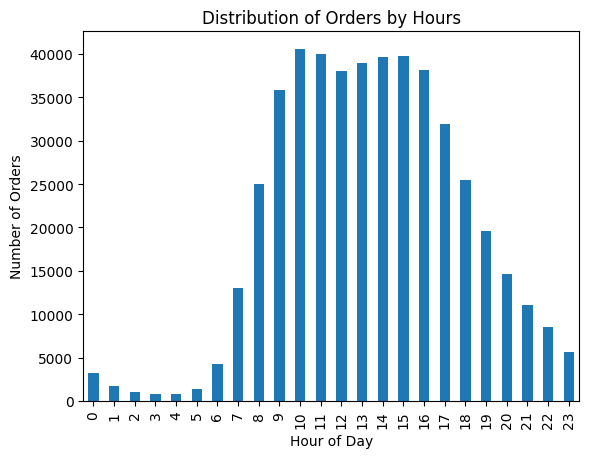

In [36]:
# print amount of orders per hour of day 
print(df_instacart_orders['order_hour_of_day'].value_counts().head(7))

# plot distribution of orders by time of day
plot_1 = df_instacart_orders['order_hour_of_day'].value_counts()
plot_1.sort_index().plot(kind='bar', title="Distribution of Orders by Hours", xlabel='Hour of Day', ylabel='Number of Orders')
plt.show()

**Summary :** Top 7 hours of the day are between 10AM and 4PM. 10AM is the most common. This analysis provides insight on inventory management and proper employee allocation. 

### What day of the week do people shop for groceries?

0    84090
1    82185
2    65833
Name: order_dow, dtype: int64


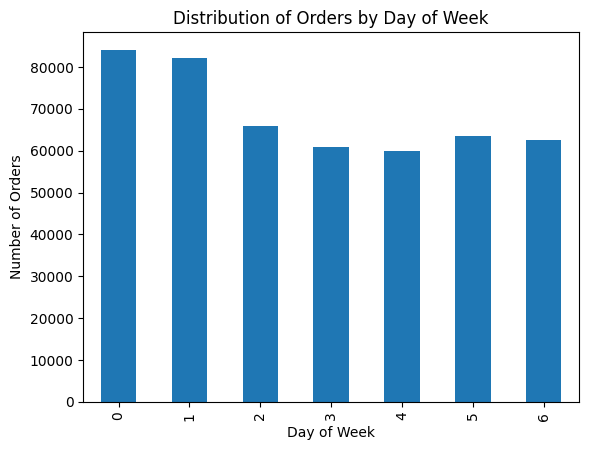

In [37]:
# print amount of orders per day of week 
print(df_instacart_orders['order_dow'].value_counts().head(3))

# plot distribution of order by day of week
plot_2 = df_instacart_orders['order_dow'].value_counts()
plot_2.sort_index().plot(kind='bar', title='Distribution of Orders by Day of Week', xlabel='Day of Week', ylabel='Number of Orders')
plt.show()

**Summary :** Assuming Sunday = 0. The top 3 days are Sunday, Monday, and Tuesday. The most common day is Sunday.This analysis provides additional insight into employee allocation and peak days. 

### How long do people wait until placing another order?

In [38]:
# print descriptive statistics of days since prior order 
print(df_instacart_orders['days_since_prior_order'].describe())

# print amount of days since prior order per order 
print()
print(df_instacart_orders['days_since_prior_order'].value_counts().head(3)) 

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

30.0    51337
7.0     44577
6.0     33930
Name: days_since_prior_order, dtype: int64


**Summary :** People spend an average of 11 days since prior order. Top three days between orders are 30, 7, and 6 days respectively. This analysis provides additional insight into marketing strategies. 

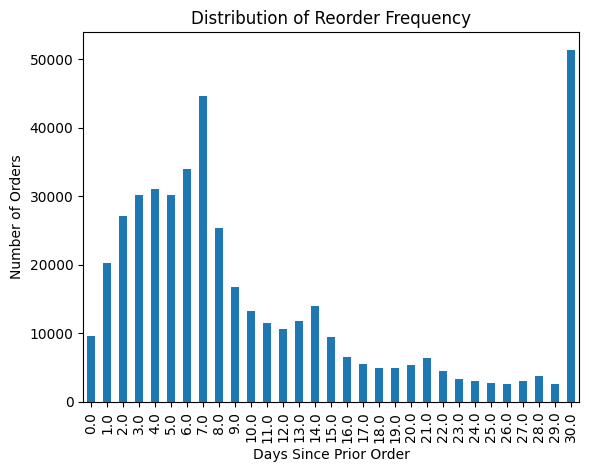

In [39]:
# plot distribution of reorder frequency
plot_3 = df_instacart_orders['days_since_prior_order'].value_counts()
plot_3.sort_index().plot(kind='bar', title='Distribution of Reorder Frequency', xlabel='Days Since Prior Order', ylabel='Number of Orders')
plt.show()


### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? 

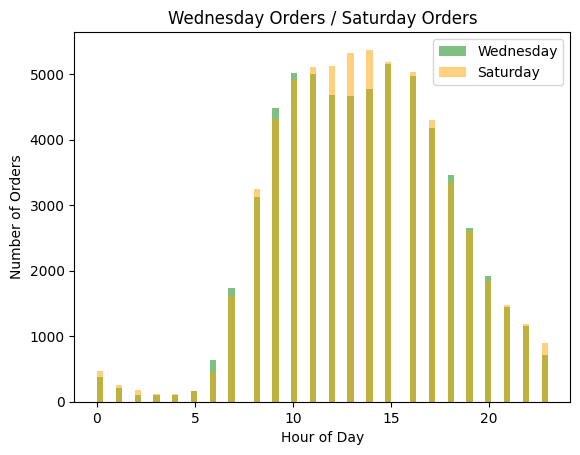

In [40]:
# filter orders for Wednesday and Saturday and plot histograms
df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=72, alpha=0.5, title='Wednesday Orders / Saturday Orders', color='green')
df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=72, alpha=0.5, color='orange')

# format visualization for easier consumption
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

**Summary :** The distribution of orders by time of day is similar for Wednesday and Saturday, except for Saturdays between 12 p.m. and 2 p.m.

### What's the distribution for the number of orders per customer?

In [41]:
# calculate number of orders per customer (1 to 28 orders per customer)
orders_per_customer = df_instacart_orders.groupby('user_id')['order_id'].nunique()
print(orders_per_customer.sort_values())

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64


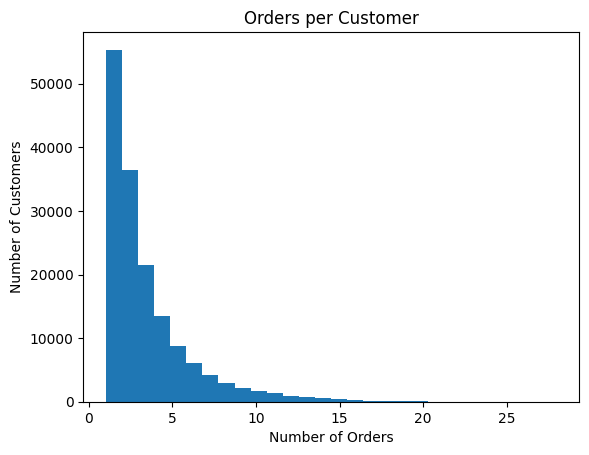

In [42]:
# plot histogram and format for consumption
orders_per_customer.plot(kind='hist', bins=28, title='Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

**Summary :** The majority of customers have made 1-5 orders with Instacart. 

### [B3] What are the top 20 popular products (display their id and name)?

In [43]:
# count the number of times each product is ordered
product_popularity = df_order_products['product_id'].value_counts()
print(product_popularity)

# calculate the top 20 most ordered products .index maintains correct index for first 20
top_20_product_ids = product_popularity.head(20).index
print()
print(top_20_product_ids)

# split products df with products with top 20 products
top_20_product_names = df_products[df_products['product_id'].isin(top_20_product_ids)][['product_id', 'product_name']]
print()
print(top_20_product_names)


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
10543        1
5222         1
2347         1
11893        1
32074        1
Name: product_id, Length: 45573, dtype: int64

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209,
            27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204,  5876,
             8277, 40706],
           dtype='int64')

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       

In [44]:
# add total orders column to check
top_20_product_names['total_orders'] = top_20_product_names['product_id'].map(product_popularity)

# sort df
top_20_product_names_sorted = top_20_product_names.sort_values(by='total_orders', ascending=False)
top_20_product_names_sorted

,product_id,product_name,total_orders
24851,24852,Banana,66050
13175,13176,Bag of Organic Bananas,53297
21136,21137,Organic Strawberries,37039
21902,21903,Organic Baby Spinach,33971
47208,47209,Organic Hass Avocado,29773
47765,47766,Organic Avocado,24689
47625,47626,Large Lemon,21495
16796,16797,Strawberries,20018
26208,26209,Limes,19690
27844,27845,Organic Whole Milk,19600


### What are the top 20 items that are reordered most frequently?

In [45]:
# create df of reordered products
reordered_products = df_order_products[df_order_products['reordered'] == 1]
print(reordered_products)

# count total orders on a reoder product
reordered_counts = reordered_products.groupby('product_id')['order_id'].count()
print(reordered_counts)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]
product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: order_id, Length: 36228, dtype: int64


In [46]:
# sort by reorder frequency and grab first 20
top_20_reordered_products = reordered_counts.sort_values(ascending=False).head(20)
top_20_reordered_products.name = "total_reorders"
print(top_20_reordered_products)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: total_reorders, dtype: int64


In [47]:
# Split products df by top 20 products based on reorder frequency
top_20_product_names = df_products[df_products['product_id'].isin(top_20_reordered_products.index)][['product_id', 'product_name']]
print(top_20_product_names)

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


In [48]:
# merge top 20 reoder frequency and top 20 product
top_20_reordered_details = pd.merge(top_20_reordered_products, top_20_product_names, on='product_id')

# add total orders column
# top_20_reordered_details['total_reorders'] = top_20_reordered_details['product_id'].map(top_20_reordered_products)
print(top_20_reordered_details)

    product_id  total_reorders              product_name
0        24852           55763                    Banana
1        13176           44450    Bag of Organic Bananas
2        21137           28639      Organic Strawberries
3        21903           26233      Organic Baby Spinach
4        47209           23629      Organic Hass Avocado
5        47766           18743           Organic Avocado
6        27845           16251        Organic Whole Milk
7        47626           15044               Large Lemon
8        27966           14748       Organic Raspberries
9        16797           13945              Strawberries
10       26209           13327                     Limes
11       22935           11145      Organic Yellow Onion
12       24964           10411            Organic Garlic
13       45007           10076          Organic Zucchini
14       49683            9538            Cucumber Kirby
15       28204            8989        Organic Fuji Apple
16        8277            8836 

In [49]:
# reorder columns
top_20_display = top_20_reordered_details[['product_id', 'product_name', 'total_reorders']]
top_20_display

,product_id,product_name,total_reorders
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


**Summary :** Top 5 redordered products bananas, organic bananas, organic strawberries, organic baby spinach, and organic hass avocado. Providing insight to future inventory needs. 

### For each product, what proportion of its orders are reorders?

In [50]:
# calculate the total number of orders for each product
total_orders_per_product = df_order_products.groupby('product_id')['order_id'].count()
print(total_orders_per_product)

# calculate the total number of reorders
reorders_per_product = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['order_id'].count()
print()
print(reorders_per_product)

# calculate the reorder proportion for each product
reorder_proportion = reorders_per_product / total_orders_per_product

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64

product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: order_id, Length: 36228, dtype: int64


In [51]:
# Split products df into df with id and name
product_details = df_products[['product_id', 'product_name']]
print(product_details)

# create df including total orders and reorders
orders_and_reorders = pd.DataFrame({
    'total_orders': total_orders_per_product,
    'reorders': reorders_per_product
}).reset_index()
print()
print(orders_and_reorders)

       product_id                                       product_name
0               1                         Chocolate Sandwich Cookies
1               2                                   All-Seasons Salt
2               3               Robust Golden Unsweetened Oolong Tea
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...
4               5                          Green Chile Anytime Sauce
...           ...                                                ...
49689       49690                      HIGH PERFORMANCE ENERGY DRINK
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                             SPRING WATER BODY WASH
49693       49694                            BURRITO- STEAK & CHEESE

[49694 rows x 2 columns]

       product_id  total_orders  reorders
0               1           280     158.0
1               2            11       NaN
2               3  

In [52]:
# Merge with product details df created earlier
orders_and_reorders = pd.merge(orders_and_reorders, product_details, on='product_id', how='left')
print(orders_and_reorders)

# add reorder_proportion column 
orders_and_reorders['reorder_proportion'] = ((orders_and_reorders['reorders'] / orders_and_reorders['total_orders']) * 100).round(1)
print()
print(orders_and_reorders)

       product_id  total_orders  reorders  \
0               1           280     158.0   
1               2            11       NaN   
2               3            42      31.0   
3               4            49      25.0   
4               7             2       1.0   
...           ...           ...       ...   
45568       49690             5       4.0   
45569       49691            72      31.0   
45570       49692            12       5.0   
45571       49693            25      11.0   
45572       49694             9       3.0   

                                            product_name  
0                             Chocolate Sandwich Cookies  
1                                       All-Seasons Salt  
2                   Robust Golden Unsweetened Oolong Tea  
3      Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                         Pure Coconut Water With Orange  
...                                                  ...  
45568                      HIGH PERFORMANCE EN

In [53]:
# reorder columns for easier consumption
orders_and_reorders = orders_and_reorders[['product_id', 'product_name', 'total_orders', 'reorders', 'reorder_proportion']]
orders_and_reorders

,product_id,product_name,total_orders,reorders,reorder_proportion
0,1,Chocolate Sandwich Cookies,280,158.0,56.4
1,2,All-Seasons Salt,11,NaN,NaN
2,3,Robust Golden Unsweetened Oolong Tea,42,31.0,73.8
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,49,25.0,51.0
4,7,Pure Coconut Water With Orange,2,1.0,50.0
...,...,...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,5,4.0,80.0
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,72,31.0,43.1
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,12,5.0,41.7
45571,49693,SPRING WATER BODY WASH,25,11.0,44.0


In [54]:
# reorder proportion is easily accessed per product by calling the product name
df_check = orders_and_reorders[orders_and_reorders['product_name'] == 'Hot Tomatillo Salsa']
df_check

# Hot Tomatillo Salsa has a reorder proportion of 10%

,product_id,product_name,total_orders,reorders,reorder_proportion
99,112,Hot Tomatillo Salsa,10,1.0,10.0


In [55]:
#ADDED BY REVIEWER

#Upload the dataframes. You can skip that step and use your own dataframes
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')

#Merge sales and products
reorder_pct = df_order_products.merge(df_products)

#Get the reorder ratio
reorder_pct = reorder_pct.groupby(['product_id', 'product_name'])['reordered'].mean().to_frame()

#Format the output
reorder_pct.head(20).style.format({'reordered': '{:.1%}'}) #format to percentage with 1 decimal

,,reordered
product_id,product_name,
1,Chocolate Sandwich Cookies,56.4%
2,All-Seasons Salt,0.0%
3,Robust Golden Unsweetened Oolong Tea,73.8%
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,51.0%
7,Pure Coconut Water With Orange,50.0%
8,Cut Russet Potatoes Steam N' Mash,31.6%
9,Light Strawberry Blueberry Yogurt,76.2%
10,Sparkling Orange Juice & Prickly Pear Beverage,44.8%
11,Peach Mango Juice,62.5%


**Summary :** Calculating a reorder proportion could provide insight into item satisfaction and future inventory needs. 

**Comprehensive Summary :**


Analysis of the distribution of orders by hour of the day revealed a clear pattern in customer behavior. The majority of orders are placed during specific peak hours, which can be important for optimizing staffing and inventory management.


"Days Since Prior Order" showed a distribution of how frequently customers reorder groceries. This metric is crucial for understanding customer retention and can guide efforts to keep customers coming back. A high frequency of reorders indicates strong customer loyalty, while longer gaps between orders may highlight opportunities for re-engagement or targeted promotions to encourage return purchases.


During the data cleanup process, missing product names were identified, which were mainly tied to specific aisle and department categories labeled as 'missing.' These missing values were filled with 'Unknown' to maintain data integrity. However, it’s important to investigate the root cause of these missing values to prevent future occurrences.


A deeper dive into the add-to-cart sequence revealed a technical issue where items added after the 64th position were not properly assigned order numbers. This could lead to tracking issues in customer carts, potentially affecting the accuracy of the checkout process.

**Actionable Insights**
- Peak hours are between 10am and 4pm.
- Sundays and Mondays have the most orders per day. 
- Typically, reorders occur on a weekly or monthly basis.  